# Projet équation différentielle



### Methodes à pas fixe

On commence tout d'abord par définir des méthodes à pas fixes, par les tester et par montrer leur ordre de convergence 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def solve_euler_explicit_v1(f,t0,tf,x0,dt):#t0 et tf temps de début et de fin de la simulation
    X=x0#initialisation
    t=t0
    x_arr=[X]
    t_arr=[t]#espace de stockage
    while t<tf:
        X=X+dt*f(X,t)
        t=t+dt
        x_arr.append(X)
        t_arr.append(t)
        return np.array(t_arr), np.array(x_arr)
    
    


In [5]:
def solve_euler_explicit_v2(f,x0,dt,n) :
    """
    Entrées :
        f, une fonction
        x0, condition initiale (x(0)=x0)
        dt, pas de temps
        n, nombre de points
    Sortie :
    renvoie le vecteur des temps tj et de la solution xj du schéma d'Euler explicite appliqué à dx/dt = f(x)
    """
    T = np.linspace(0,dt*(n-1), n)
    X = np.zeros(n)
    X[0]=x0
    for j in range(1,n) :
        X[j] = X[j-1] + dt*f(X[j-1])
    return(T,X)

In [6]:
def solve_heun_explicit (f,x0,dt,n) :
    """
    Entrées :
        f, une fonction
        x0, condition initiale (x(0)=x0)
        dt, pas de temps
        n, nombre de points
    Sortie :
    renvoie le vecteur des temps tj et de la solution xj du schéma de Heun explicite appliqué à dx/dt = f(x)
    """
    T = np.linspace(0,dt*(n-1), n)
    X = np.zeros(n)
    X[0]=x0
    for j in range(1,n) :
        X[j] = X[j-1] + (dt/2) * ( f(X[j-1]) + f( X[j-1] + dt*f(X[j-1]) ) )
    return(T,X)

In [ ]:
#Pour euler explicite

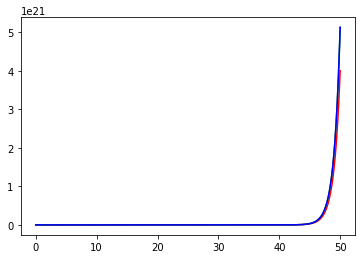

In [7]:
def f1(x) :
    return x

n=5000
x0=1
dt=10**-2
T,X1=solve_euler_explicit_v2(f1,x0,dt,n)
T,X2=solve_heun_explicit(f1,x0,dt,n)
Y = np.exp(T)
plt.plot(T,X1,'r')
plt.plot(T,X2,'g')
plt.plot(T,Y,'b')


plt.show()

In [ ]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T